# SPY

평균 연간 거래일 수: 248일


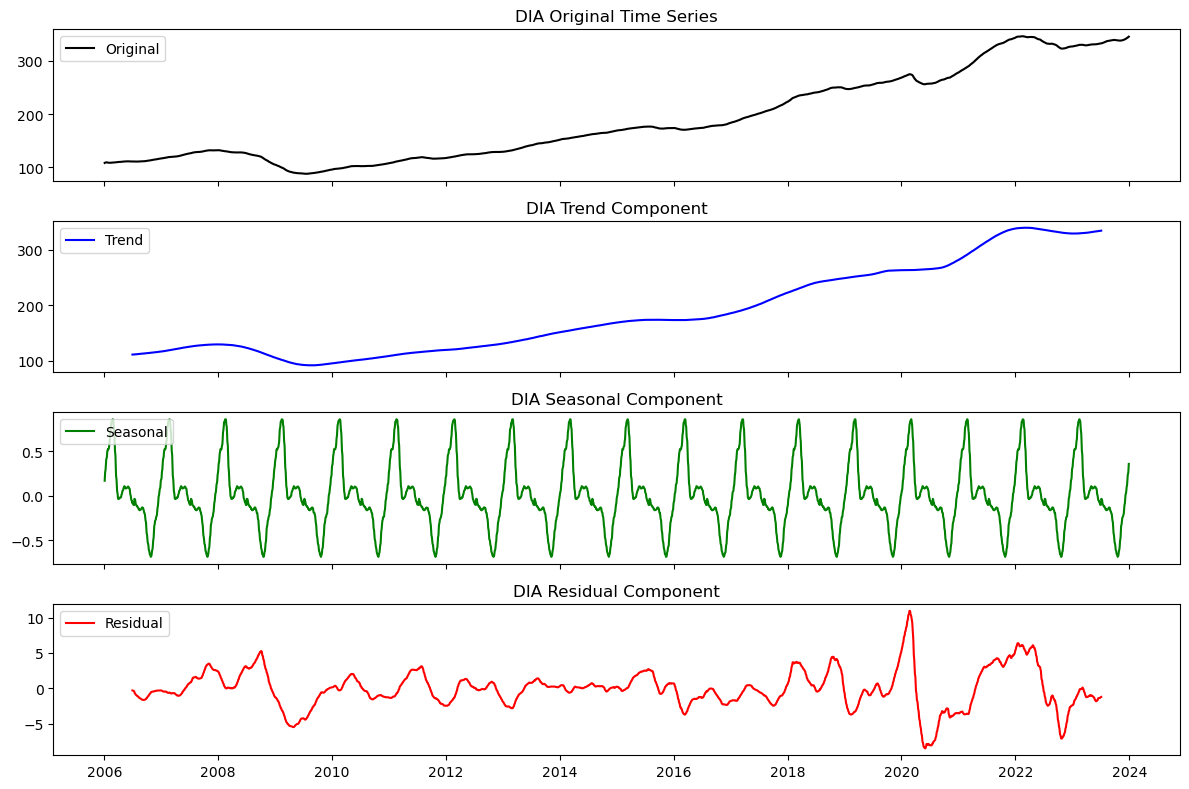

평균 연간 거래일 수: 248일


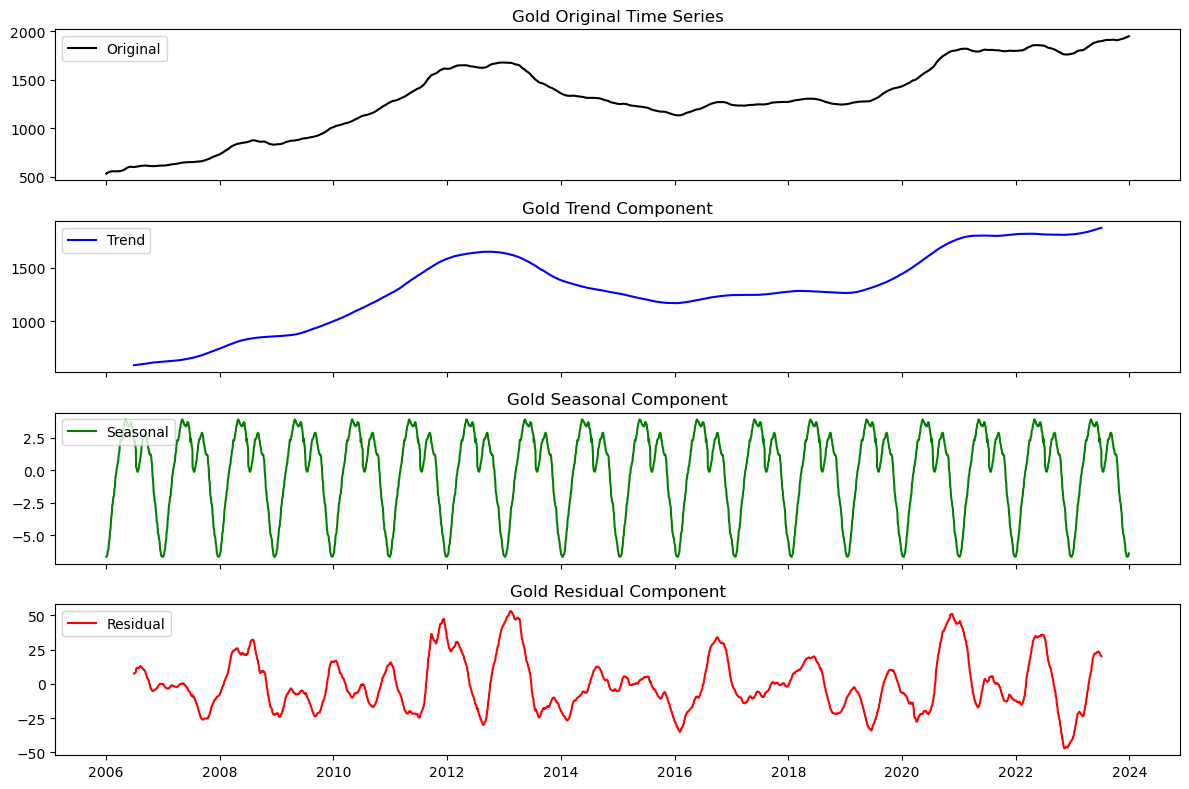

평균 연간 거래일 수: 248일


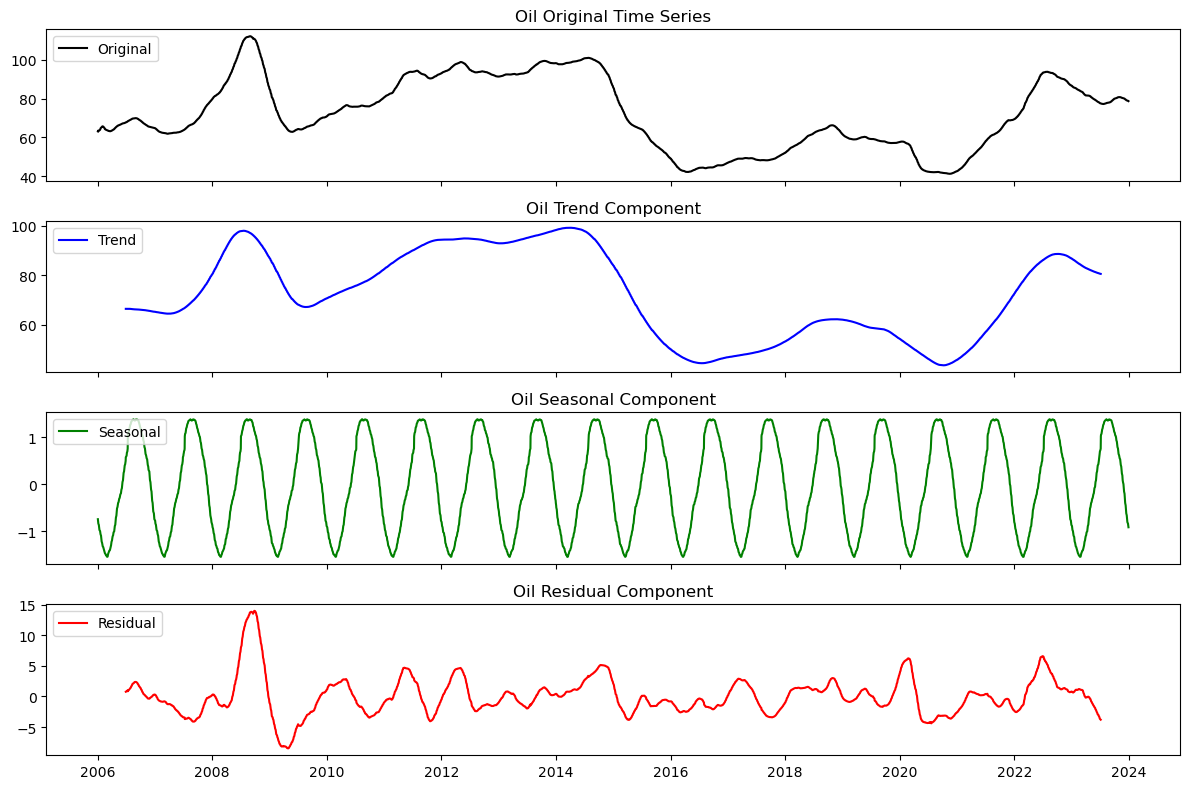

평균 연간 거래일 수: 248일


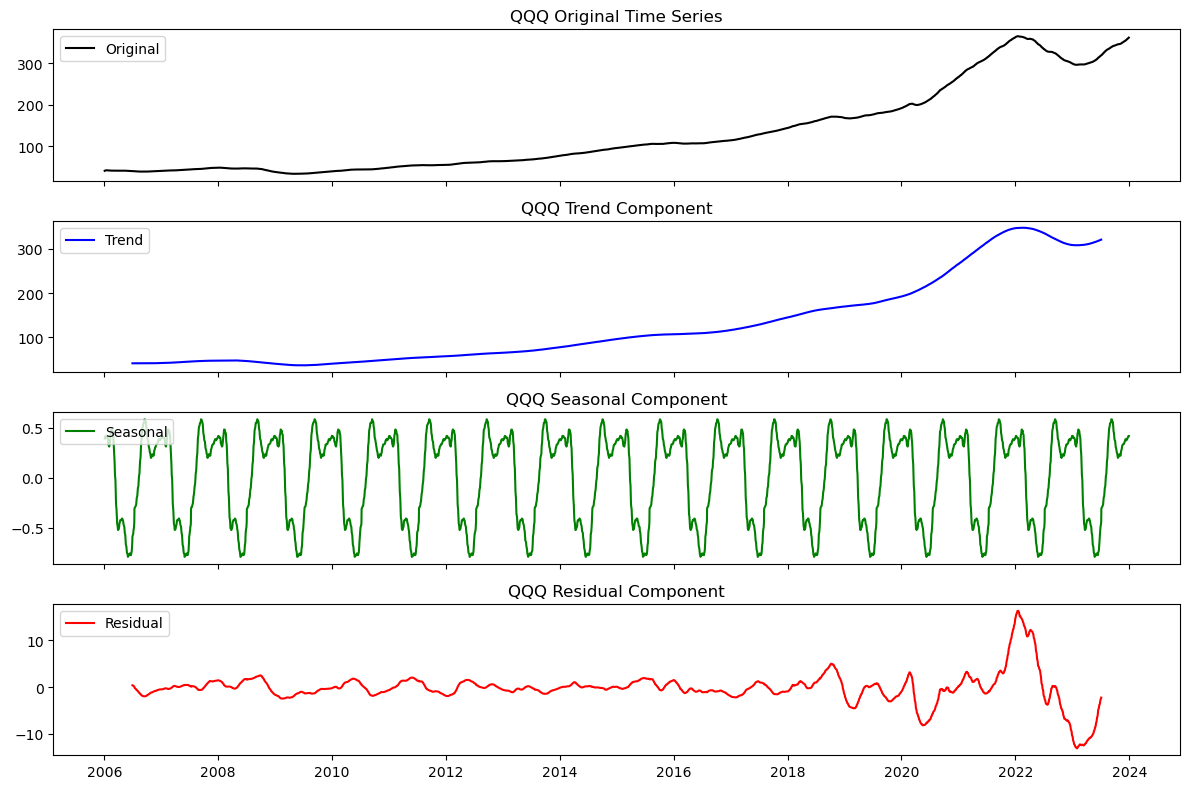

평균 연간 거래일 수: 248일


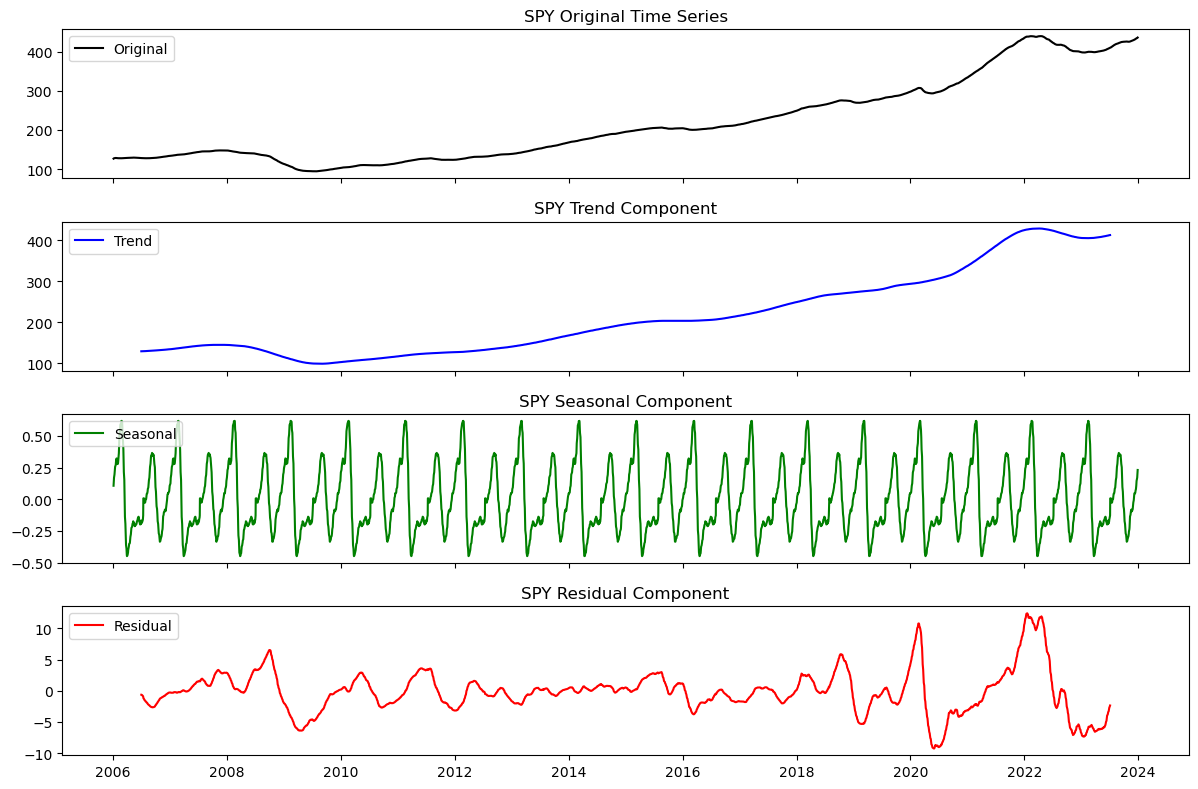

평균 연간 거래일 수: 248일


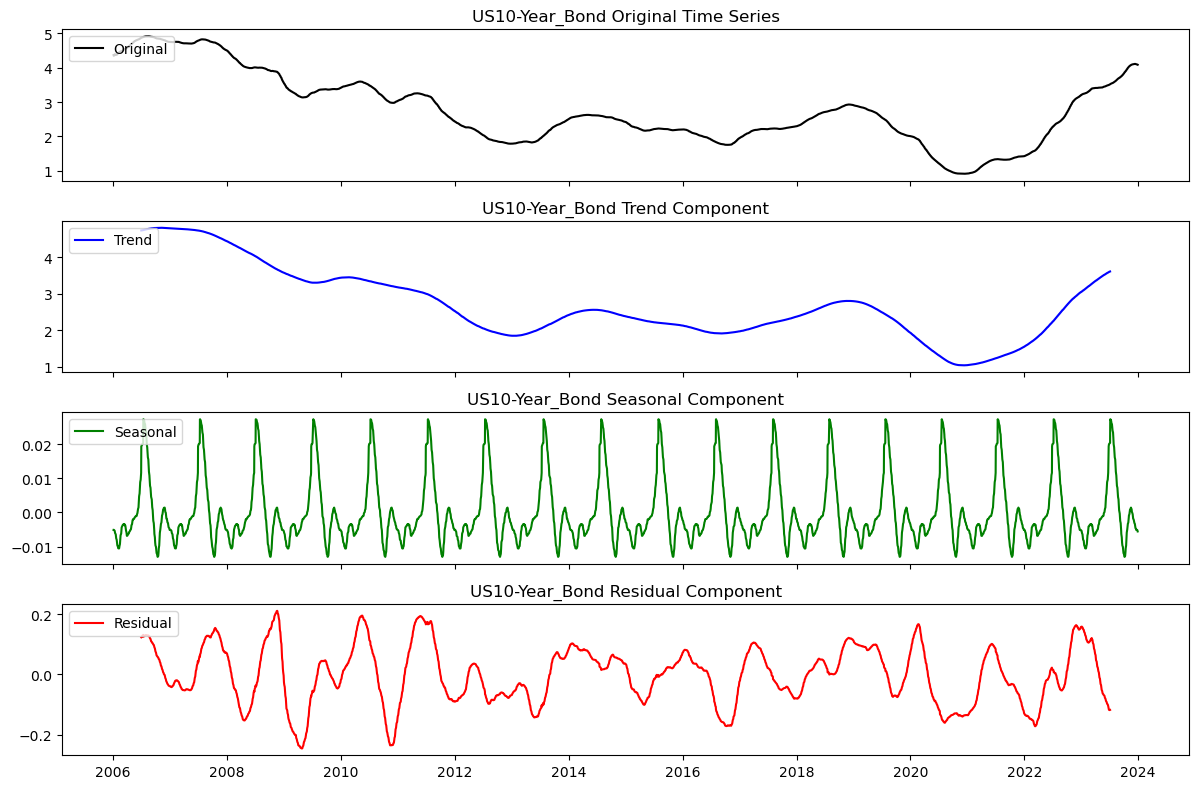

평균 연간 거래일 수: 248일


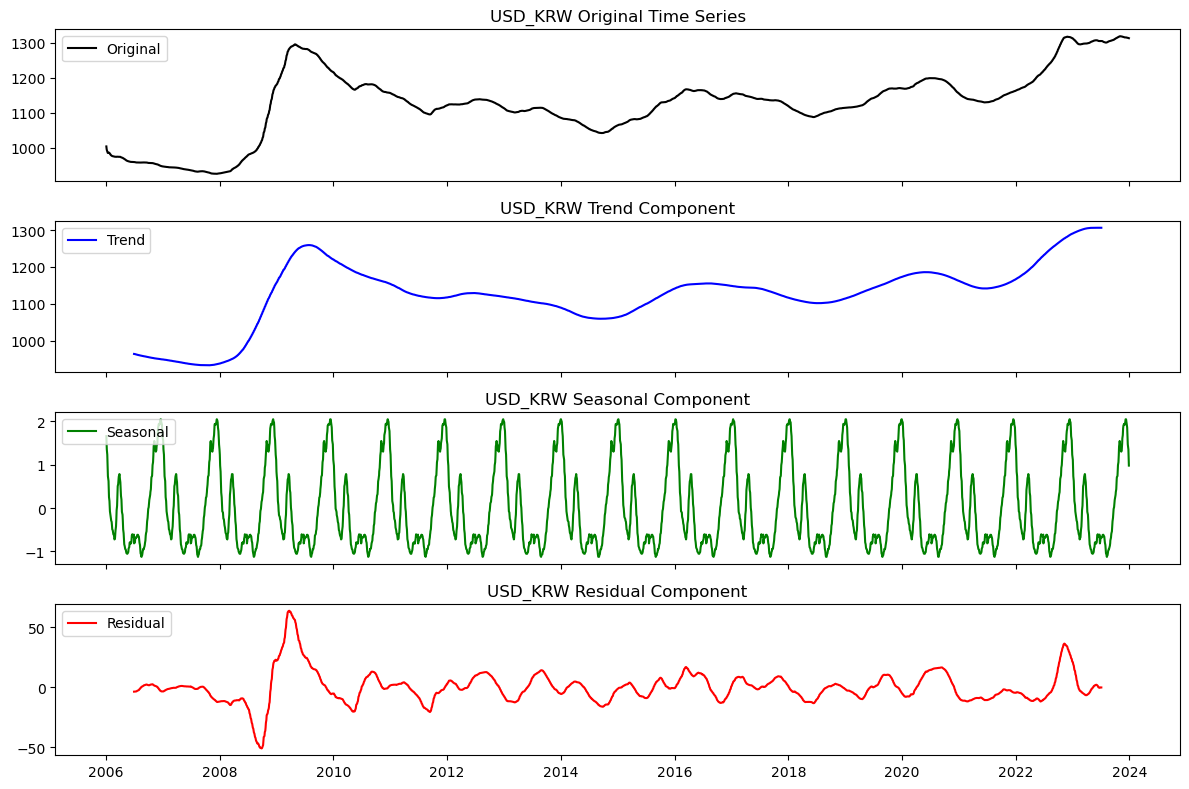

평균 연간 거래일 수: 248일


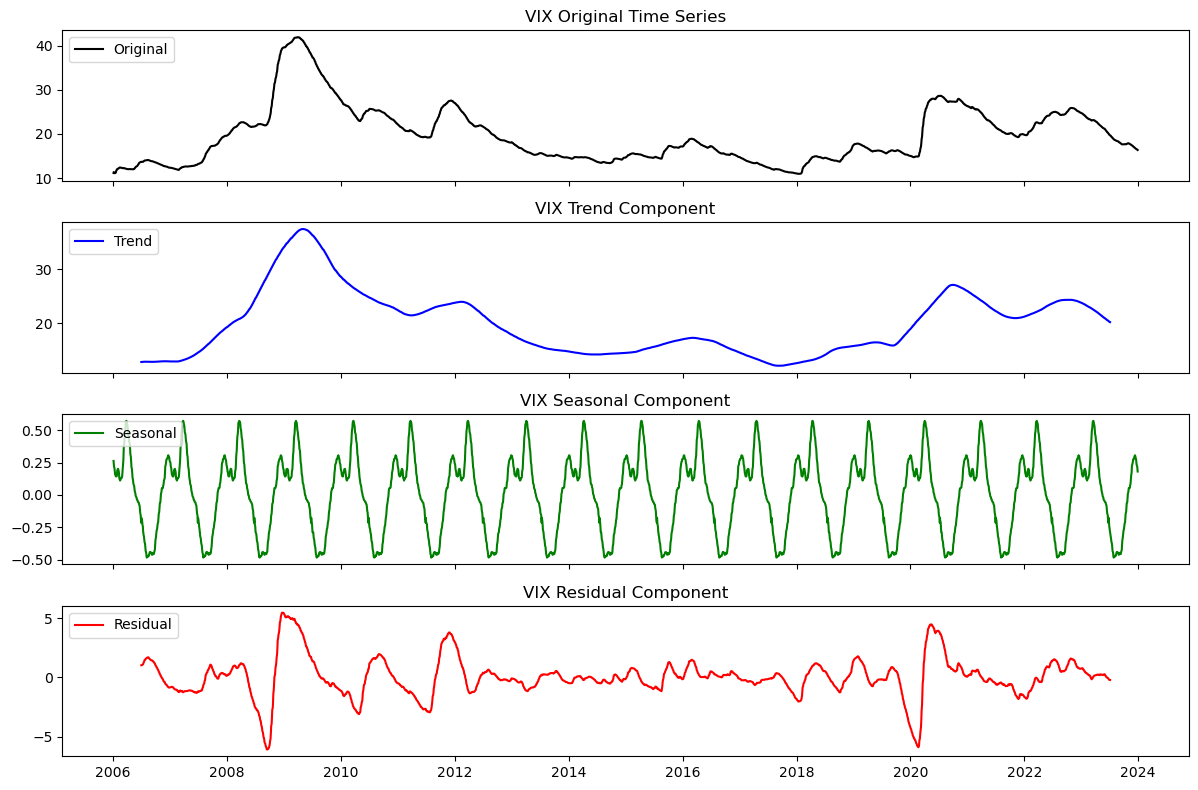

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


charts = ['./Kalman_filtered_data/k_filtered_DIA.csv','./Kalman_filtered_data/k_filtered_Gold.csv',
          './Kalman_filtered_data/k_filtered_Oil.csv','./Kalman_filtered_data/k_filtered_QQQ.csv',
          './Kalman_filtered_data/k_filtered_SPY.csv','./Kalman_filtered_data/k_filtered_US10-Year_Bond.csv',
          './Kalman_filtered_data/k_filtered_USD_KRW.csv','./Kalman_filtered_data/k_filtered_VIX.csv']

save = ['./residual_data/DIA_residual.csv','./residual_data/Gold_residual.csv','./residual_data/Oil_residual.csv',
'./residual_data/QQQ_residual.csv','./residual_data/SPY_residual.csv',
'./residual_data/US10-Year_Bond_residual.csv','./residual_data/USD_KRW_residual.csv','./residual_data/VIX_residual.csv']

indices=['DIA','Gold','Oil','QQQ','SPY','US10-Year_Bond','USD_KRW','VIX']

for i in range(8):
    # 데이터 불러오기
    df = pd.read_csv(charts[i], parse_dates=['Date'], index_col='Date')

    # # Price 칼럼 확인

    # df = df[['Price']].dropna()  # 결측치 제거코드, 근데 결측치가 없어서 굳이 사용 안해도됨

    # 연도별 거래일 수 계산
    df['Year'] = df.index.year
    yearly_counts = df.groupby('Year').size()
    avg_trading_days = int(yearly_counts.mean())

    print(f"평균 연간 거래일 수: {avg_trading_days}일")

    # 시계열 분해 수행 (동적 주기 적용)
    decomposition = seasonal_decompose(df['Price'], model='additive', period=avg_trading_days)

    # 분해된 요소 추출
    original = decomposition.observed
    trend = decomposition.trend #앞뒤로 120일정도 날아가있음
    seasonal = decomposition.seasonal
    residual = decomposition.resid #앞뒤로 120일정도 날아가있음

    #residaul 데이터 저장
    residual_clean = residual.dropna() # nan행 제거
    residual_clean.to_csv(save[i])

    # 그래프 출력
    fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

    axes[0].plot(original, label='Original', color='black')
    axes[0].legend(loc='upper left')
    axes[0].set_title(indices[i]+' Original Time Series')

    axes[1].plot(trend, label='Trend', color='blue')
    axes[1].legend(loc='upper left')
    axes[1].set_title(indices[i]+' Trend Component')

    axes[2].plot(seasonal, label='Seasonal', color='green')
    axes[2].legend(loc='upper left')
    axes[2].set_title(indices[i]+' Seasonal Component')

    axes[3].plot(residual, label='Residual', color='red')
    axes[3].legend(loc='upper left')
    axes[3].set_title(indices[i]+' Residual Component')
    
    plt.tight_layout()
    plt.show()


In [10]:
#print(df['Price'])
# print("trend")
#print(trend[170:190])
# print("seasonal")
# print(seasonal[:30])
# print("residual")
# print(residual)
#print(decomposition.observed)

2. FFT를 이용한 주기 분석

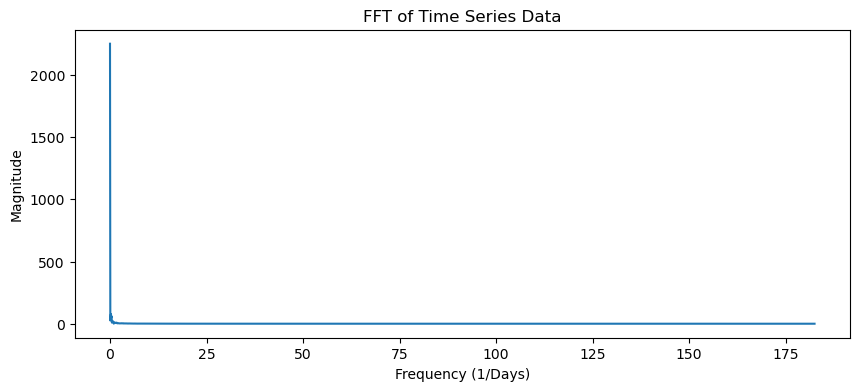

In [18]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

# 결측치 제거 후 NumPy 배열로 변환
price_data = df['Price'].dropna().to_numpy()  # NumPy 배열로 변환

# Fourier Transform 수행
n = len(price_data)
yf = fft(price_data)
xf = np.linspace(0.0, 1.0 / (2.0 * (1 / 365)), n // 2)  # 365일 단위 변환

# 주파수 성분 시각화
plt.figure(figsize=(10, 4))
plt.plot(xf, 2.0 / n * np.abs(yf[:n // 2]))
plt.title("FFT of Time Series Data")
plt.xlabel("Frequency (1/Days)")
plt.ylabel("Magnitude")
plt.show()
